# 1번
- 데이터 경로 /kaggle/input/adp-p6/problem1.csv 

### 데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     


### 데이터 출처
- https://archive.ics.uci.edu/ml/index.php

In [102]:
import pandas as pd

df = pd.read_csv('/kaggle/input/adp-p6/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


## 1-1. 결측치를 확인하고, 결측치 제거할 것

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [104]:
#quantity, unitprice에 결측치 있는 것 확인
df.dropna(subset = ['Quantity', 'UnitPrice'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35679 non-null  object 
 1   StockCode    35679 non-null  object 
 2   Description  35679 non-null  object 
 3   Quantity     35679 non-null  float64
 4   InvoiceDate  35679 non-null  object 
 5   UnitPrice    35679 non-null  float64
 6   CustomerID   35679 non-null  float64
 7   Country      35679 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.4+ MB


## 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

이상치 확인

이상치를 확인하는 방법은 데이터에 따라 다양하지만, 주로 boxplot에서 닫힌구간 [Q1-1.5IQR, Q3+1.5IQR] 밖에 있는 값을 이상치로 정의한다. 물론, 정규화를 이용하여 이상치를 정의할 수도 있다.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# InvoiceDate의 dtype을 datetime으로 변경
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    35679 non-null  object        
 1   StockCode    35679 non-null  object        
 2   Description  35679 non-null  object        
 3   Quantity     35679 non-null  float64       
 4   InvoiceDate  35679 non-null  datetime64[ns]
 5   UnitPrice    35679 non-null  float64       
 6   CustomerID   35679 non-null  float64       
 7   Country      35679 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.4+ MB


In [106]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,35679.000000,35679.000000,35679.000000
mean,18.436475,4.612573,13221.406794
std,42.203163,48.099265,1011.790701
min,-480.000000,0.000000,12354.000000
25%,4.000000,1.250000,12523.000000
50%,10.000000,1.950000,12681.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17097.000000


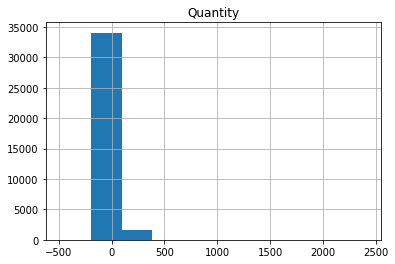

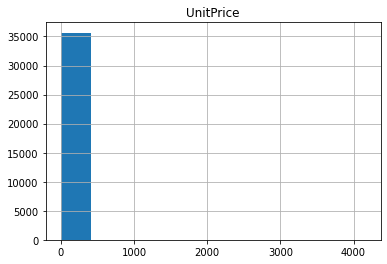

In [107]:
for col in ['Quantity', 'UnitPrice']:
    df[col].hist()
    plt.title(col)
    plt.show()

* Quantity가 0 이하인 것은 의미가 없으므로 제거
* UnitPrice가 0인 것은 의미가 없어 제거

In [108]:
outlier_index = df[(df['Quantity'] <= 0) | (df['UnitPrice'] == 0)].index

df_drop = df.drop(index = outlier_index, axis = 0)

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34677 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    34677 non-null  object        
 1   StockCode    34677 non-null  object        
 2   Description  34677 non-null  object        
 3   Quantity     34677 non-null  float64       
 4   InvoiceDate  34677 non-null  datetime64[ns]
 5   UnitPrice    34677 non-null  float64       
 6   CustomerID   34677 non-null  float64       
 7   Country      34677 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.4+ MB


또한, 모델 학습에서 InvoiceNo, StockCode는 사용하지 않으므로 제거

In [109]:
df_drop = df.drop(columns = ['InvoiceNo', 'StockCode'], axis = 1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Description  35679 non-null  object        
 1   Quantity     35679 non-null  float64       
 2   InvoiceDate  35679 non-null  datetime64[ns]
 3   UnitPrice    35679 non-null  float64       
 4   CustomerID   35679 non-null  float64       
 5   Country      35679 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.9+ MB


Description, Country는 labalencoding해주자

In [110]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_drop['Description'] = encoder.fit_transform(df_drop['Description'])
df_drop['Country'] = encoder.fit_transform(df_drop['Country'])

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Description  35679 non-null  int64         
 1   Quantity     35679 non-null  float64       
 2   InvoiceDate  35679 non-null  datetime64[ns]
 3   UnitPrice    35679 non-null  float64       
 4   CustomerID   35679 non-null  float64       
 5   Country      35679 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.9 MB


한번 살 때 총 구매액을 하나의 피처로 사용하고, Quantity와 UnitPrice를 삭제하자

In [111]:
df_drop['M'] = df['Quantity'] * df['UnitPrice']

df_drop = df_drop.drop(columns = ['Quantity', 'UnitPrice'], axis = 1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Description  35679 non-null  int64         
 1   InvoiceDate  35679 non-null  datetime64[ns]
 2   CustomerID   35679 non-null  float64       
 3   Country      35679 non-null  int64         
 4   M            35679 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.6 MB


In [112]:
df_drop['InvoiceDate'].describe()

count                   35679
unique                   1825
top       2011-10-11 14:52:00
freq                      258
first     2010-12-01 08:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

날짜도 이상한 것 없는 것 확인했고, 학습에는 사용하지 않으므로 제거

In [113]:
df_drop = df_drop.drop(columns = ['InvoiceDate'], axis = 1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  35679 non-null  int64  
 1   CustomerID   35679 non-null  float64
 2   Country      35679 non-null  int64  
 3   M            35679 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.4 MB


M 변수는 스케일링이 필요

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

M = pd.DataFrame(df_drop['M'])

M = scaler.fit_transform(M)

df_drop['M'] = M
df_drop

,Description,CustomerID,Country,M
0,2619,12626.0,3,-0.215595
1,1406,14911.0,1,-0.180012
2,1114,12362.0,0,-0.180012
3,1730,14646.0,4,-0.018271
4,1908,12583.0,2,-0.206969
...,...,...,...,...
35796,1933,12708.0,3,-0.180012
35797,2112,12681.0,2,-0.131490
35798,2180,12572.0,3,-0.154781
35799,2616,12573.0,2,-0.320727



## 1-3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

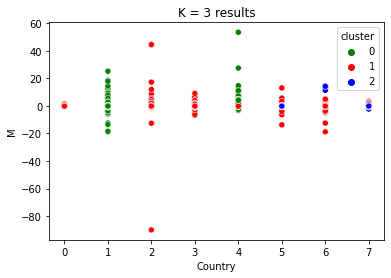

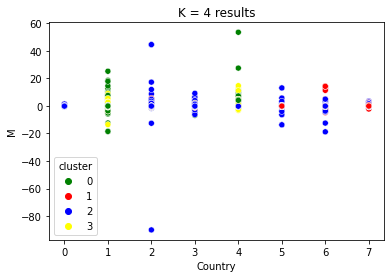

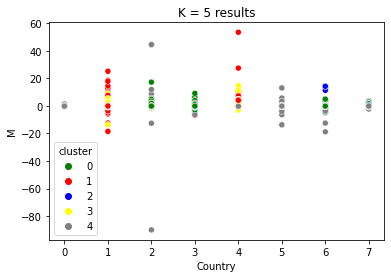

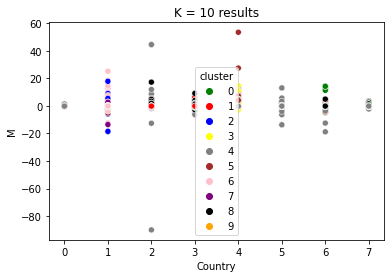

In [124]:
# 시각화랑 같이 하기
from sklearn.cluster import KMeans
import seaborn as sns

k = [3, 4, 5, 10]
palette = ['green', 'red', 'blue', 'yellow', 'gray', 'brown', 'pink', 'purple', 'black', 'orange']
for i in k:
    model = KMeans(n_clusters = i, random_state = 731)
    model.fit(df_drop)
    df_drop['cluster'] = model.fit_predict(df_drop)
    sns.scatterplot(x='Country', y='M', hue = 'cluster', data = df_drop, palette = palette[:i])
    plt.title('K = %d results'%i)
    plt.show()

# 2번

## 2-1. 위에서 생성한 군집들의 특성을 분석할 것

## 2-2. 각 군집 별 대표 추천 상품을 도출할 것

## 2-3. CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

# 3번
### 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

# 4번
### 다음은 1월부터 9월까지의 은의 가격이다
![image](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem2.png?raw=true)

## 4-1 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

## 4-2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

# 5번 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다.      
# 자치구별 지지율이 같은지에 대해서 검정하라



![image](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem3.png?raw=true)

## 5-1 연구가설과 귀무가설을 설정하라

## 5-2 검정통계량 구하고 결론을 내라

# 6번 
## A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem4.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

## 6-1. 연구가설과 귀무가설 설정하라

## 6-2. 통계량을 구하고, 연구가설 채택여부를 기술하라.

## 6-3. 6-2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

# 7번 
## height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라.
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.      
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

## 7-1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

## 7-2 7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [127]:
import pandas as pd
from scipy import stats 

table = pd.DataFrame({'1선거구':[172, 45], '2선거구':[124,58], '3선거구':[157,65]},
                     index=['지지함', '지지하지 않음'])
   
f, p, _, _ = stats.chi2_contingency(observed=table)

print(f, p)

7.081891215739675 0.02898590481917518
